In [13]:
%matplotlib inline
from functools import partial
import matplotlib.pyplot as plt

from jax.api import jit, grad, vmap
from jax import random, ops
from jax.experimental import optimizers
import jax.numpy as np
import jax.scipy.stats.norm as norm

import time

In [14]:
lr = 1e-1
num_samples = 100

In [15]:
def diag_gaussian_sample(rng, mean, log_std):
    # Take a single sample from a diagonal multivariate Gaussian.
    return mean + np.exp(log_std) * random.normal(rng, mean.shape)

def diag_gaussian_logpdf(x, mean, log_std):
    # Evaluate a single point on a diagonal multivariate Gaussian.
    return np.sum(vmap(norm.logpdf)(x, mean, np.exp(log_std)))

def elbo(logprob, rng, mean, log_std):
    # Single-sample Monte Carlo estimate of the variational lower bound.
    sample = diag_gaussian_sample(rng, mean, log_std)
    return logprob(sample) - diag_gaussian_logpdf(sample, mean, log_std)

def relbo(logprob, rng, mean, log_std):
    sample = diag_gaussian_sample(rng, mean, log_std)
    g_lp = grad(logprob)
    
    ss = sample + lr*g_lp(sample)
    mm = mean + lr*g_lp(sample)
    
    return logprob(ss) - diag_gaussian_logpdf(ss, mm, log_std)
    #return logprob(ss) - diag_gaussian_logpdf(sample, mean, log_std)

def batch_elbo(logprob, rng, params, num_samples):
    # Average over a batch of random samples.
    rngs = random.split(rng, num_samples)
    vectorized_elbo = vmap(partial(elbo, logprob), in_axes=(0, None, None))
    return np.mean(vectorized_elbo(rngs, *params))

def batch_relbo(logprob, rng, params, num_samples):
    # Average over a batch of random samples.
    rngs = random.split(rng, num_samples)
    vectorized_relbo = vmap(partial(relbo, logprob), in_axes=(0, None, None))
    return np.mean(vectorized_relbo(rngs, *params))

In [16]:
#@partial(jit, static_argnums=(0, 1, 2, 4))
def mesh_eval(func, x_limits, y_limits, params, num_ticks=401):
    # Evaluate func on a 2D grid defined by x_limits and y_limits.
    x = np.linspace(*x_limits, num=num_ticks)
    y = np.linspace(*y_limits, num=num_ticks)
    X, Y = np.meshgrid(x, y)
    xy_vec = np.stack([X.ravel(), Y.ravel()]).T
    zs = vmap(func, in_axes=(0, None))(xy_vec, params)
    return X, Y, zs.reshape(X.shape)

In [26]:
def funnel_log_density(params):
    return norm.logpdf(params[0], 0, 0.5) + \
           norm.logpdf(params[1], 0, np.sqrt(1 - params[0]**2))
    return norm.logpdf(params[0], 0, np.exp(params[1])) + \
           norm.logpdf(params[1], 0, 1.35)

Optimizing variational parameters...
dt  3.5214483737945557
Iteration 0 lower bound nan


/home/victor/miniconda3/lib/python3.6/site-packages/matplotlib/contour.py:1557: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
/home/victor/miniconda3/lib/python3.6/site-packages/matplotlib/contour.py:1558: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())
/home/victor/miniconda3/lib/python3.6/site-packages/matplotlib/contour.py:1203: RuntimeWarning: invalid value encountered in less
  under = np.nonzero(lev < self.zmin)[0]
/home/victor/miniconda3/lib/python3.6/site-packages/matplotlib/contour.py:1205: RuntimeWarning: invalid value encountered in greater
  over = np.nonzero(lev > self.zmax)[0]
/home/victor/miniconda3/lib/python3.6/site-packages/matplotlib/contour.py:1239: RuntimeWarning: invalid value encountered in greater
  inside = (self.levels > self.zmin) & (self.levels < self.zmax)
/home/victor/miniconda3/lib/python3.6/site-packages/matplotlib/contour.py:1239: RuntimeWarning: invalid value encountered in

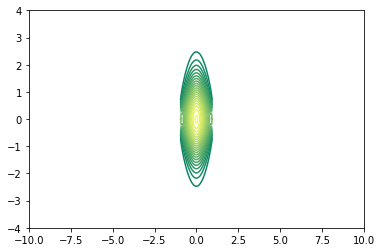

dt  0.0011904239654541016
Iteration 1 lower bound nan


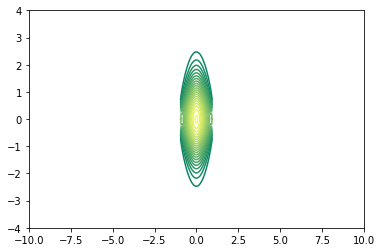

dt  0.0011606216430664062
Iteration 2 lower bound nan


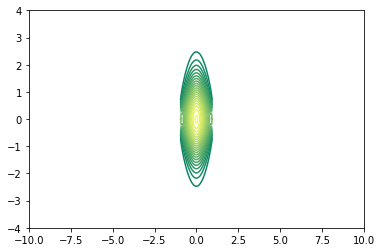

dt  0.0010895729064941406
Iteration 3 lower bound nan


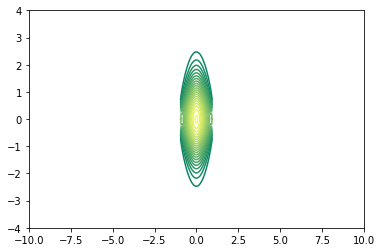

dt  0.0012581348419189453
Iteration 4 lower bound nan


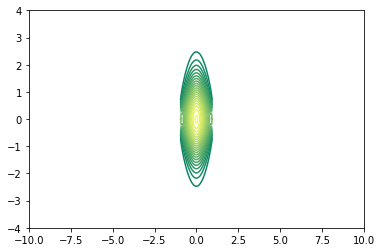

dt  0.0012218952178955078
Iteration 5 lower bound nan


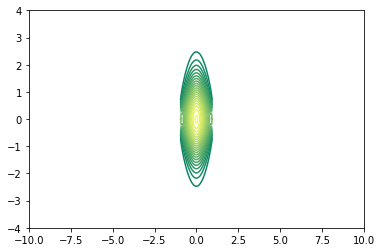

dt  0.00106048583984375
Iteration 6 lower bound nan


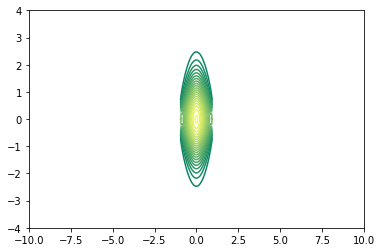

dt  0.0007715225219726562
Iteration 7 lower bound nan


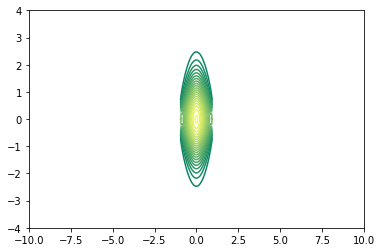

dt  0.001028299331665039
Iteration 8 lower bound nan


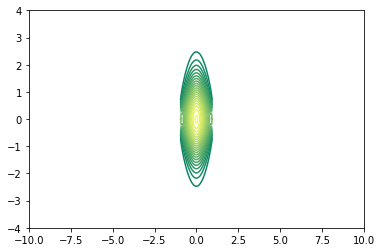

dt  0.0012950897216796875
Iteration 9 lower bound nan


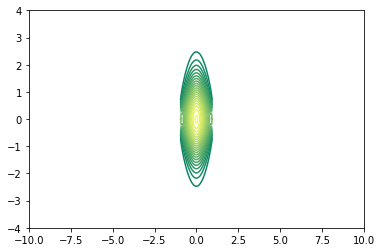

dt  0.001049041748046875
Iteration 10 lower bound nan


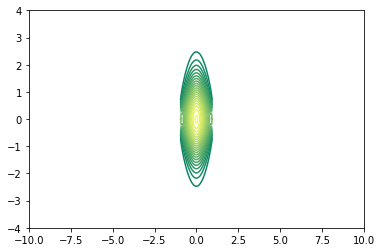

dt  0.0008187294006347656
Iteration 11 lower bound nan


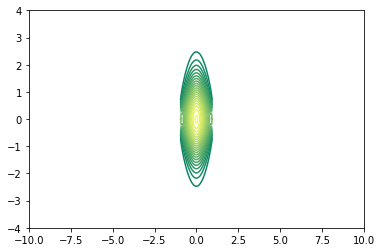

dt  0.0010569095611572266
Iteration 12 lower bound nan


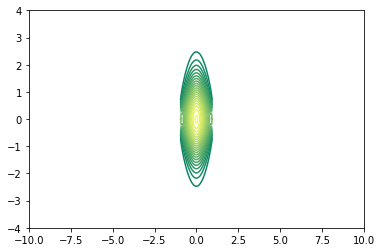

dt  0.0010581016540527344
Iteration 13 lower bound nan


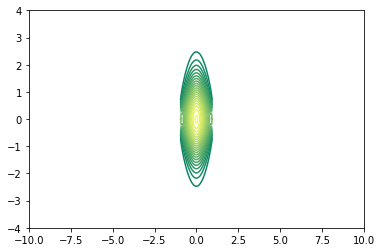

dt  0.0010569095611572266
Iteration 14 lower bound nan


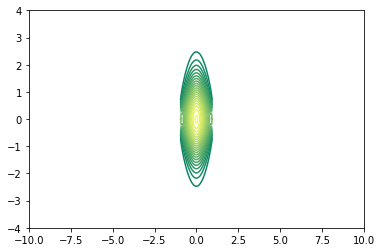

dt  0.0010836124420166016
Iteration 15 lower bound nan


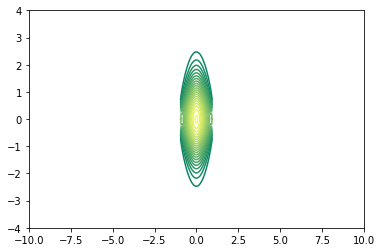

dt  0.0011315345764160156
Iteration 16 lower bound nan


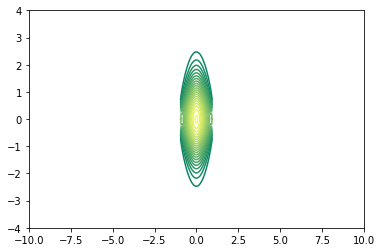

dt  0.000989675521850586
Iteration 17 lower bound nan


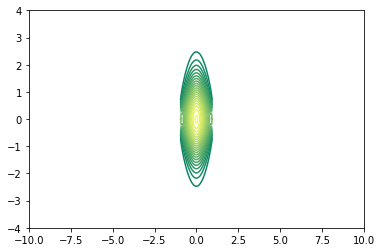

dt  0.0010101795196533203
Iteration 18 lower bound nan


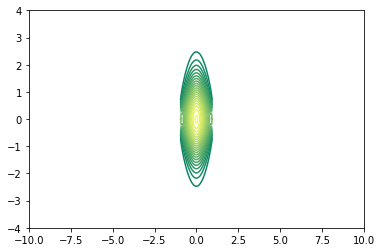

dt  0.001071929931640625
Iteration 19 lower bound nan


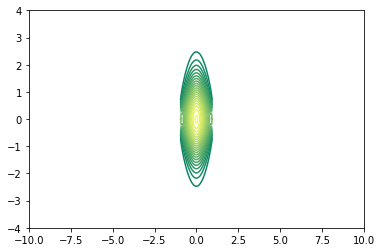

dt  0.0010409355163574219
Iteration 20 lower bound nan


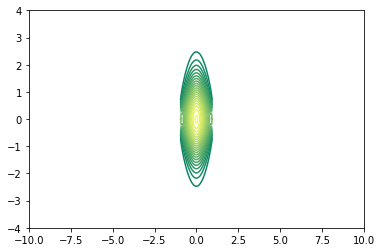

dt  0.0010576248168945312
Iteration 21 lower bound nan


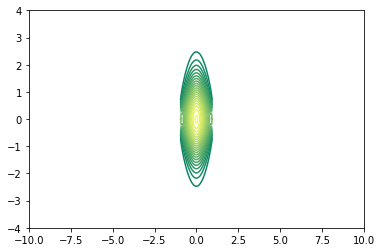

dt  0.001127481460571289
Iteration 22 lower bound nan


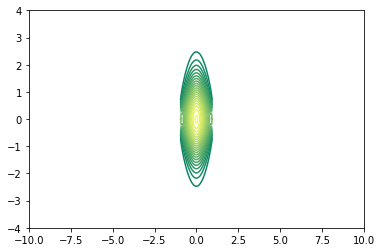

dt  0.0011310577392578125
Iteration 23 lower bound nan


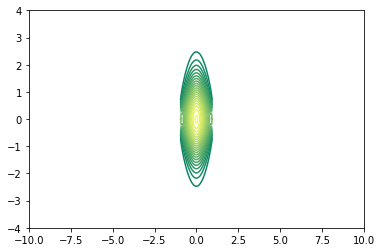

dt  0.0010411739349365234
Iteration 24 lower bound nan


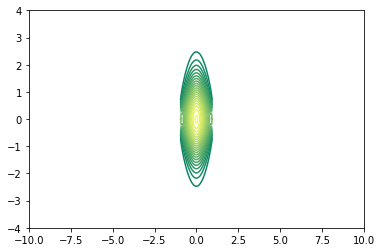

dt  0.0011050701141357422
Iteration 25 lower bound nan


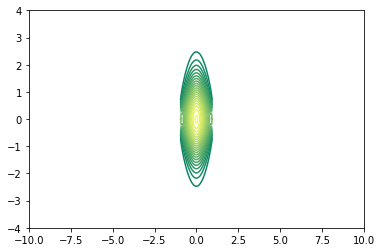

dt  0.0009968280792236328
Iteration 26 lower bound nan


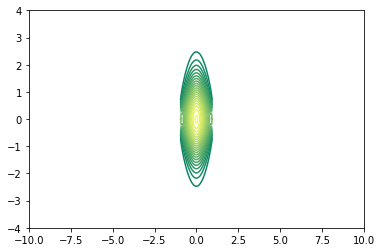

dt  0.001074075698852539
Iteration 27 lower bound nan


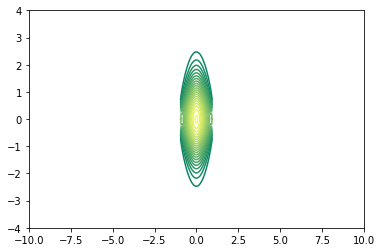

dt  0.0010118484497070312
Iteration 28 lower bound nan


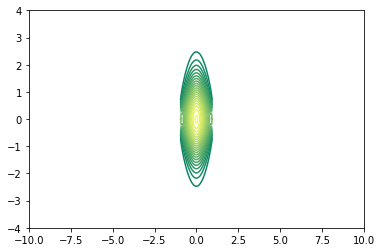

dt  0.0009844303131103516
Iteration 29 lower bound nan


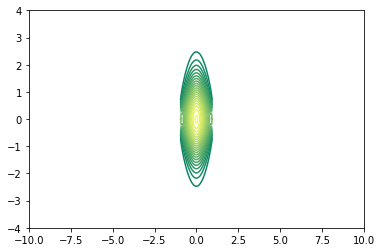

dt  0.0009951591491699219
Iteration 30 lower bound nan


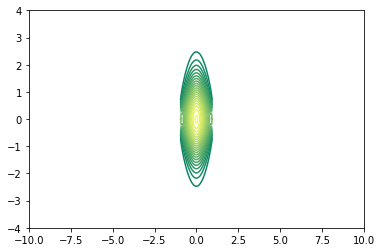

dt  0.001005411148071289
Iteration 31 lower bound nan


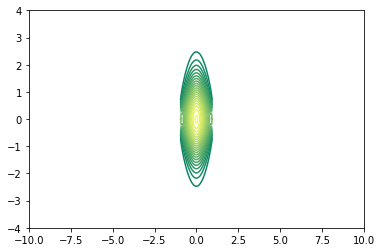

dt  0.0011365413665771484
Iteration 32 lower bound nan


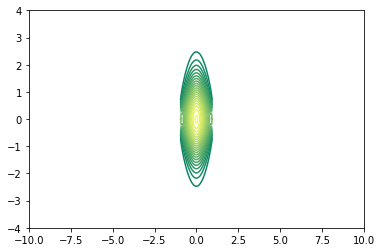

dt  0.001012563705444336
Iteration 33 lower bound nan


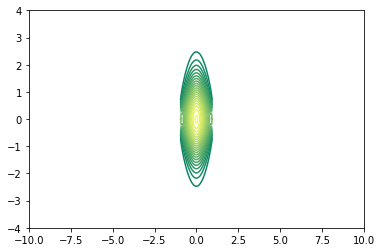

dt  0.001031637191772461
Iteration 34 lower bound nan


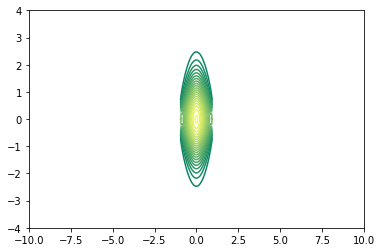

dt  0.0010356903076171875
Iteration 35 lower bound nan


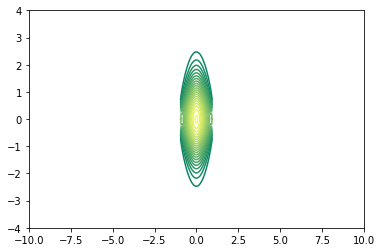

dt  0.0010325908660888672
Iteration 36 lower bound nan


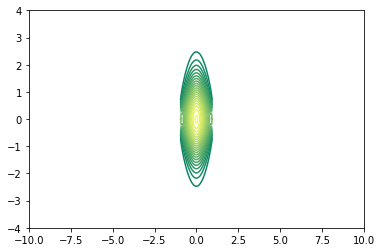

dt  0.0010581016540527344
Iteration 37 lower bound nan


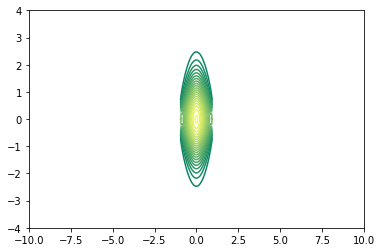

dt  0.0011391639709472656
Iteration 38 lower bound nan


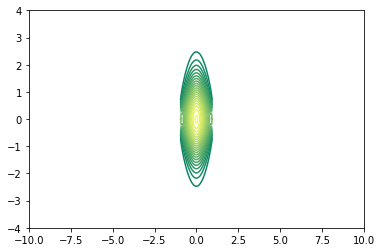

dt  0.001165628433227539
Iteration 39 lower bound nan


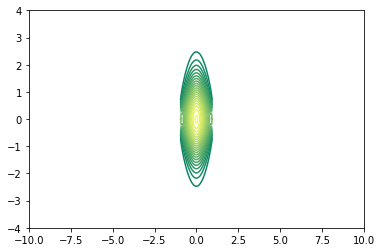

dt  0.0011820793151855469
Iteration 40 lower bound nan


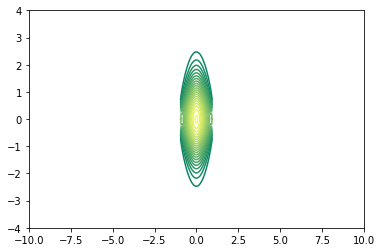

dt  0.0011355876922607422
Iteration 41 lower bound nan


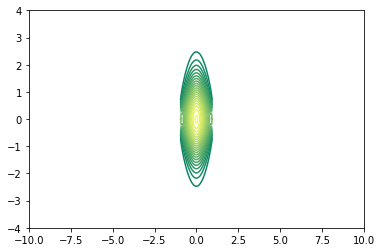

dt  0.0010762214660644531
Iteration 42 lower bound nan


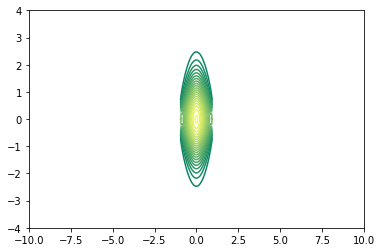

dt  0.0009396076202392578
Iteration 43 lower bound nan


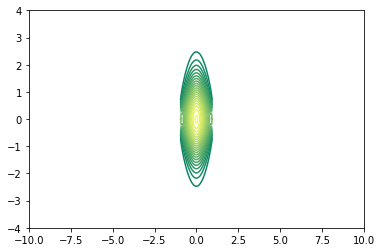

dt  0.0009961128234863281
Iteration 44 lower bound nan


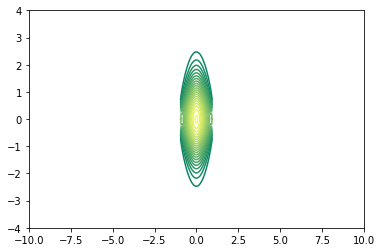

dt  0.0012340545654296875
Iteration 45 lower bound nan


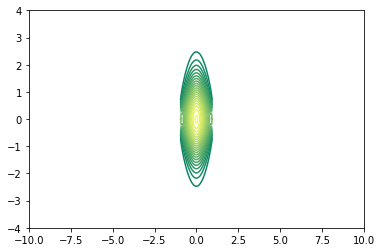

dt  0.0012497901916503906
Iteration 46 lower bound nan


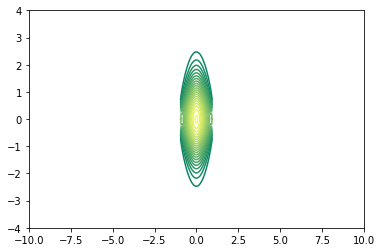

dt  0.001127481460571289
Iteration 47 lower bound nan


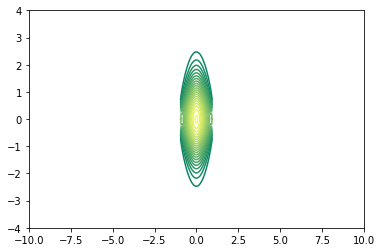

dt  0.0010955333709716797
Iteration 48 lower bound nan


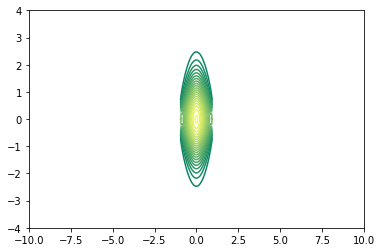

dt  0.0010943412780761719
Iteration 49 lower bound nan


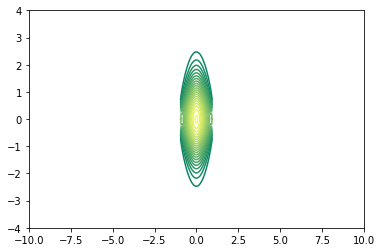

In [27]:
use_relbo = False

use_relbo = True
ms_orig = []

#for seed in [0, 1, 2]:
for seed in [0]:


    def objective(params, t):
        rng = random.PRNGKey(t + seed)
        return -batch_elbo(funnel_log_density, rng, params, num_samples)

    # Set up figure.
    #fig = plt.figure(figsize=(8,8), facecolor='white')
    #ax = fig.add_subplot(111, frameon=False)
    #plt.ion()
    #plt.show(block=False)
    x_limits = [-10, 10]
    y_limits = [-4, 4]
    target_dist = lambda x, _: np.exp(funnel_log_density(x))
    approx_dist = lambda x, params: np.exp(diag_gaussian_logpdf(x, *params))

    def callback(params, t):
        loss = objective(params, t)
        print("Iteration {} lower bound {}".format(t, loss))

        rngs = random.split(random.PRNGKey(t), num_samples)

        plt.cla()
        X, Y, Z = mesh_eval(target_dist, x_limits, y_limits, 1)
        plt.contour(X, Y, Z, levels = 30, cmap='summer')
        #plt.hold(True)

        if use_relbo:
            samples = vmap(diag_gaussian_sample, in_axes=(0, None, None))(rngs, *params)

            sample = np.mean(samples, axis=0)
            g_lp = grad(funnel_log_density)

            ss = sample + lr*g_lp(sample)
            params = (ss, params[1])
        X, Y, Z = mesh_eval(approx_dist, x_limits, y_limits, params)
        plt.contour(X, Y, Z, levels = 10, cmap='winter')
        #plt.set_xlim(x_limits)
        #plt.set_ylim(y_limits)
        #plt.set_yticks([])
        #plt.set_xticks([])

        # Plot random samples from variational distribution.
        # Here we clone the rng used in computing the objective
        # so that we can show exactly the same samples.

        #samples = vmap(diag_gaussian_sample, in_axes=(0, None, None))(rngs, *params)
        #ss = samples

        #for i in range(40):
        #    ss[i] = samples[i] + 0.1*g_lp(samples[i])

        #plt.plot(samples[:, 0], samples[:, 1], 'b.')
        #plt.plot(ss[:, 0], ss[:, 1], 'b.')

        plt.xlim(x_limits)
        plt.ylim(y_limits)

        plt.draw()
        plt.pause(1.0/60.0)
        return loss


    # Set up optimizer.
    D = 2
    init_mean = np.zeros(D) + np.asarray([1., 2.])
    init_std  = np.zeros(D)
    init_params = (init_mean, init_std)
    opt_init, opt_update, get_params = optimizers.momentum(step_size=lr, mass=0.9)
    #opt_init, opt_update, get_params = optimizers.adam(step_size=lr)
    opt_state = opt_init(init_params)

    @jit
    def update(i, opt_state):
        params = get_params(opt_state)
        gradient = grad(objective)(params, i)
        return opt_update(i, gradient, opt_state)

    metrics_orig = []

    # Main loop.
    print("Optimizing variational parameters...")
    for t in range(50):
        t0 = time.time()
        opt_state = update(t, opt_state)
        params = get_params(opt_state)
        print('dt ', time.time() - t0)
        metrics_orig.append(callback(params, t))
    plt.show(block=True)
    
    ms_orig.append(metrics_orig)

Optimizing variational parameters...
dt  4.205687999725342
Iteration 0 lower bound nan


/home/victor/miniconda3/lib/python3.6/site-packages/matplotlib/contour.py:1557: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
/home/victor/miniconda3/lib/python3.6/site-packages/matplotlib/contour.py:1558: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())
/home/victor/miniconda3/lib/python3.6/site-packages/matplotlib/contour.py:1203: RuntimeWarning: invalid value encountered in less
  under = np.nonzero(lev < self.zmin)[0]
/home/victor/miniconda3/lib/python3.6/site-packages/matplotlib/contour.py:1205: RuntimeWarning: invalid value encountered in greater
  over = np.nonzero(lev > self.zmax)[0]
/home/victor/miniconda3/lib/python3.6/site-packages/matplotlib/contour.py:1239: RuntimeWarning: invalid value encountered in greater
  inside = (self.levels > self.zmin) & (self.levels < self.zmax)
/home/victor/miniconda3/lib/python3.6/site-packages/matplotlib/contour.py:1239: RuntimeWarning: invalid value encountered in

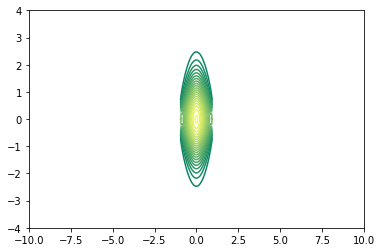

dt  0.0013020038604736328
Iteration 1 lower bound nan


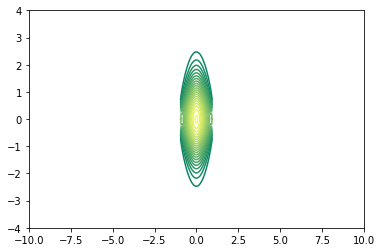

dt  0.001049041748046875
Iteration 2 lower bound nan


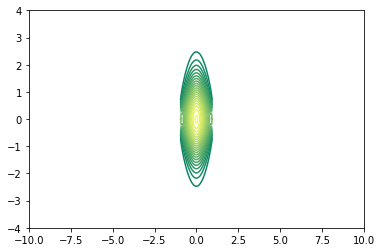

dt  0.0010929107666015625
Iteration 3 lower bound nan


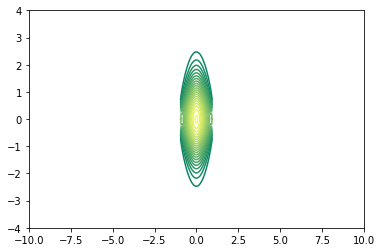

dt  0.0010974407196044922
Iteration 4 lower bound nan


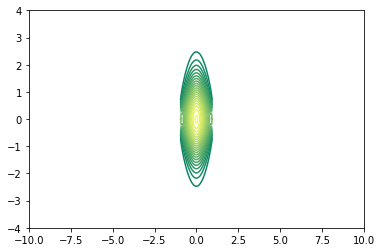

dt  0.0011768341064453125
Iteration 5 lower bound nan


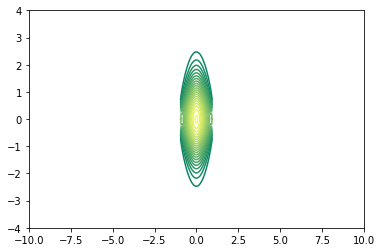

dt  0.0011348724365234375
Iteration 6 lower bound nan


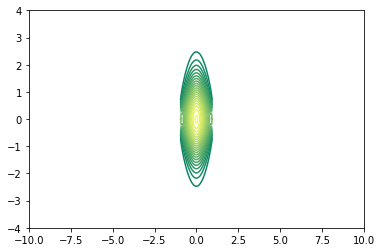

dt  0.0011110305786132812
Iteration 7 lower bound nan


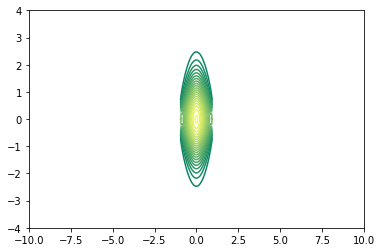

dt  0.0010530948638916016
Iteration 8 lower bound nan


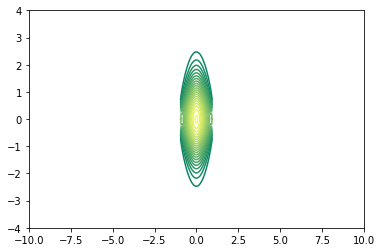

dt  0.0010950565338134766
Iteration 9 lower bound nan


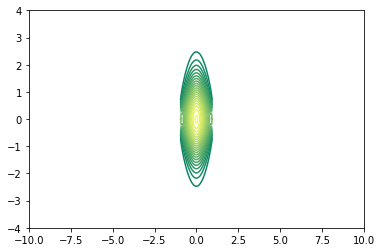

dt  0.0011110305786132812
Iteration 10 lower bound nan


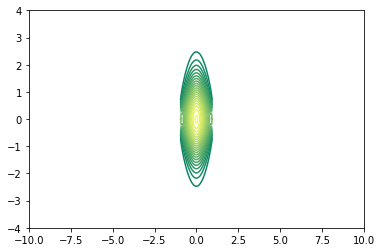

dt  0.0010592937469482422
Iteration 11 lower bound nan


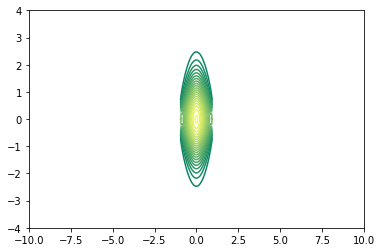

dt  0.0009756088256835938
Iteration 12 lower bound nan


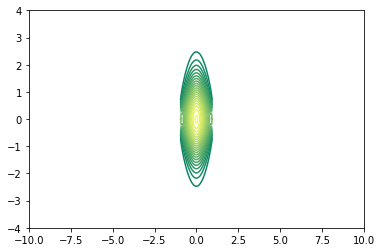

dt  0.0010590553283691406
Iteration 13 lower bound nan


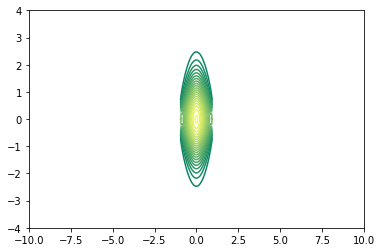

dt  0.0010647773742675781
Iteration 14 lower bound nan


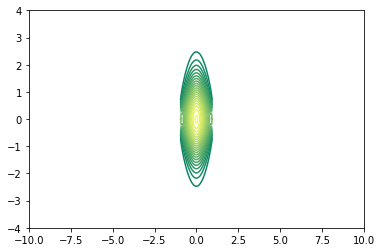

dt  0.0010862350463867188
Iteration 15 lower bound nan


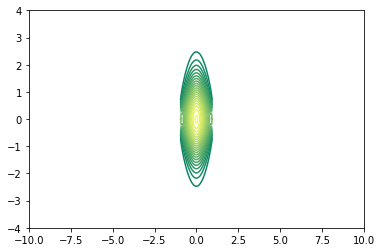

dt  0.0011048316955566406
Iteration 16 lower bound nan


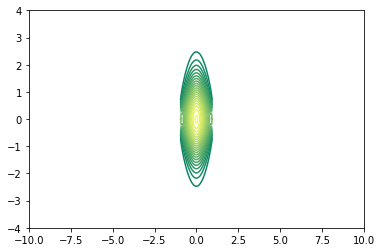

dt  0.0011200904846191406
Iteration 17 lower bound nan


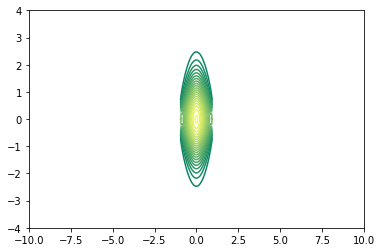

dt  0.0010290145874023438
Iteration 18 lower bound nan


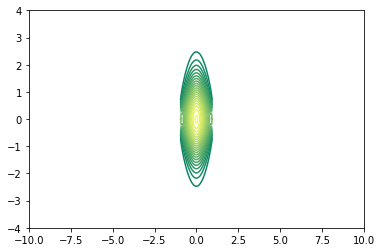

dt  0.0010776519775390625
Iteration 19 lower bound nan


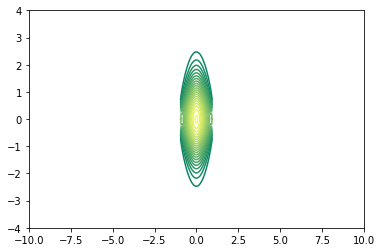

dt  0.0010454654693603516
Iteration 20 lower bound nan


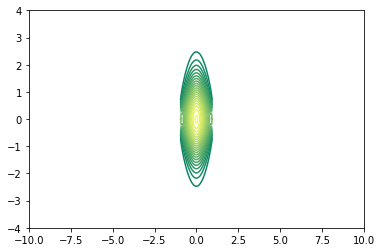

dt  0.00102996826171875
Iteration 21 lower bound nan


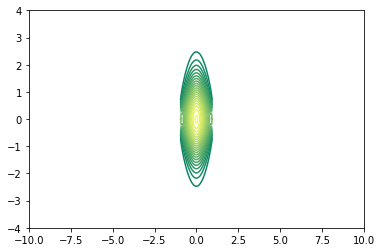

dt  0.001132965087890625
Iteration 22 lower bound nan


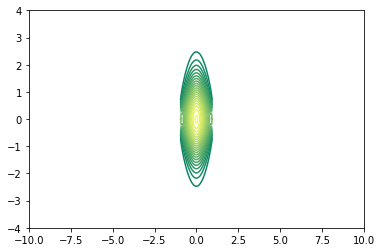

dt  0.001056671142578125
Iteration 23 lower bound nan


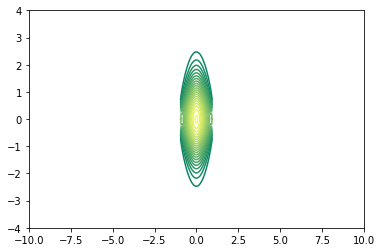

dt  0.0011436939239501953
Iteration 24 lower bound nan


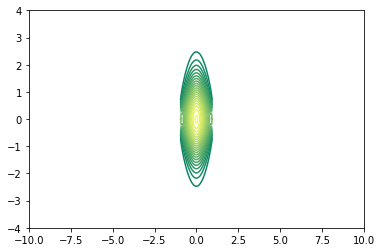

dt  0.0010917186737060547
Iteration 25 lower bound nan


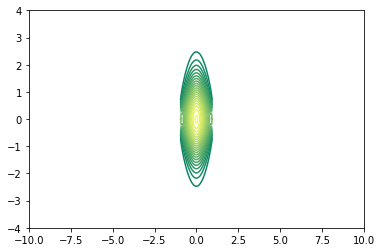

dt  0.0010924339294433594
Iteration 26 lower bound nan


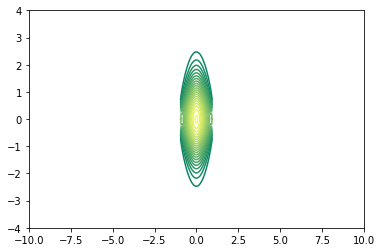

dt  0.0011954307556152344
Iteration 27 lower bound nan


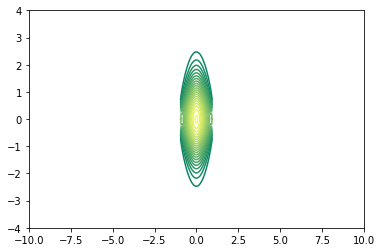

dt  0.001146078109741211
Iteration 28 lower bound nan


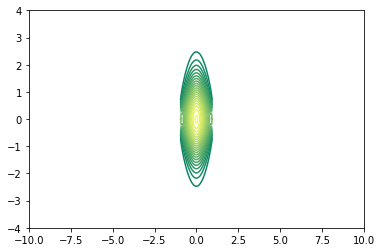

dt  0.0011324882507324219
Iteration 29 lower bound nan


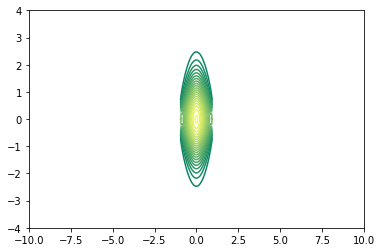

dt  0.0012164115905761719
Iteration 30 lower bound nan


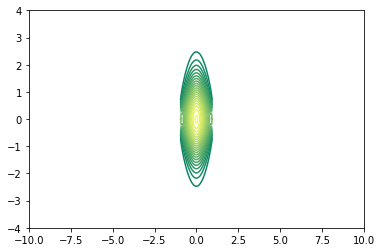

dt  0.0012044906616210938
Iteration 31 lower bound nan


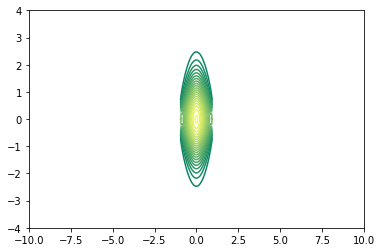

dt  0.0010881423950195312
Iteration 32 lower bound nan


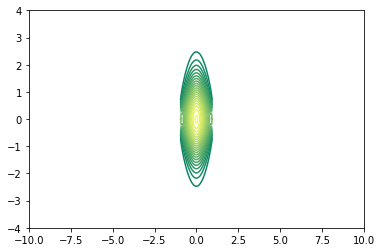

dt  0.0011136531829833984
Iteration 33 lower bound nan


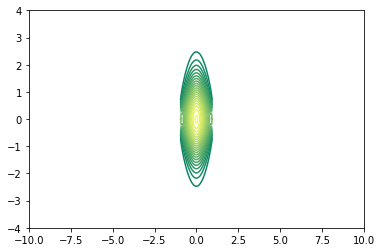

dt  0.0012667179107666016
Iteration 34 lower bound nan


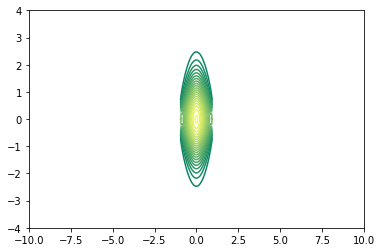

dt  0.0010564327239990234
Iteration 35 lower bound nan


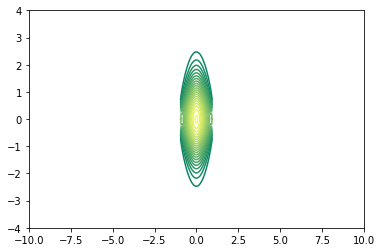

dt  0.0011017322540283203
Iteration 36 lower bound nan


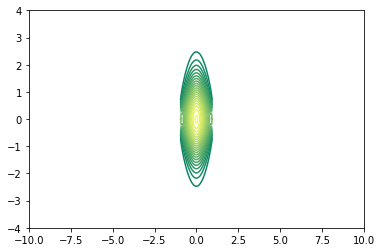

dt  0.0010521411895751953
Iteration 37 lower bound nan


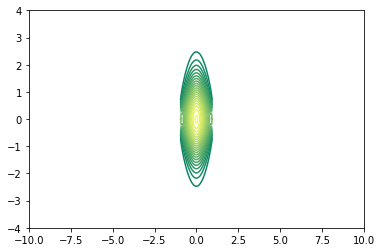

dt  0.001088857650756836
Iteration 38 lower bound nan


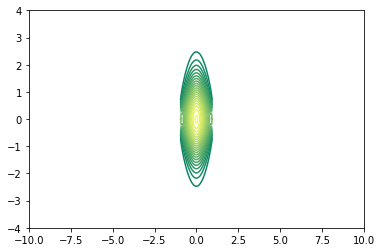

dt  0.0012035369873046875
Iteration 39 lower bound nan


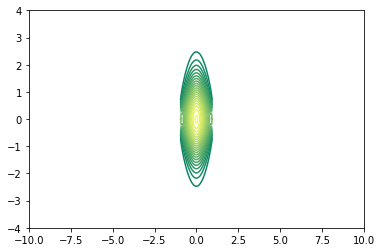

dt  0.0012347698211669922
Iteration 40 lower bound nan


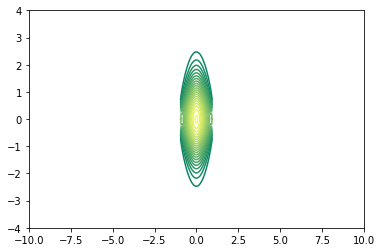

dt  0.0012242794036865234
Iteration 41 lower bound nan


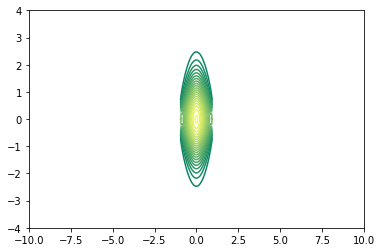

dt  0.001371145248413086
Iteration 42 lower bound nan


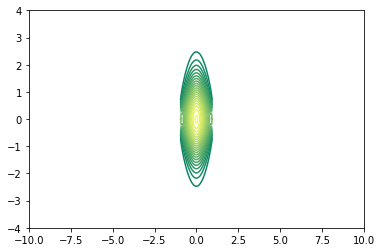

dt  0.001322031021118164
Iteration 43 lower bound nan


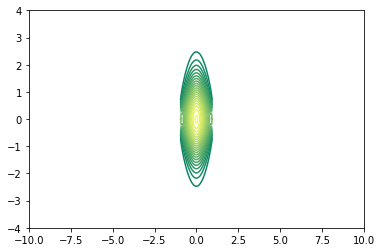

dt  0.0012781620025634766
Iteration 44 lower bound nan


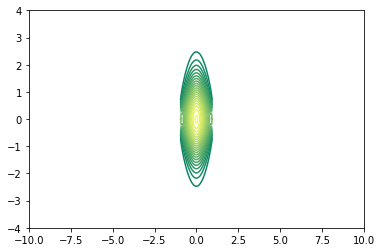

dt  0.00113677978515625
Iteration 45 lower bound nan


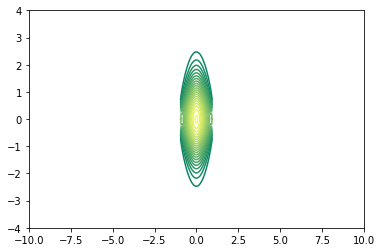

dt  0.0011324882507324219
Iteration 46 lower bound nan


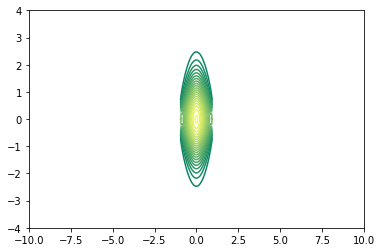

dt  0.001134634017944336
Iteration 47 lower bound nan


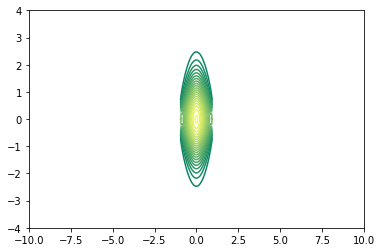

dt  0.001087188720703125
Iteration 48 lower bound nan


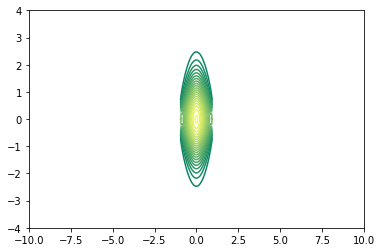

dt  0.0011413097381591797
Iteration 49 lower bound nan


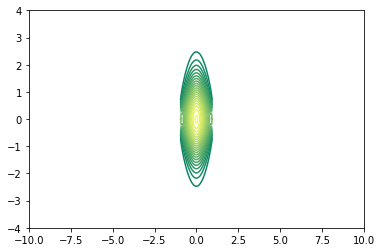

In [28]:
use_relbo = True
ms = []

#for seed in [0, 1, 2]:
for seed in [0]:


    def objective(params, t):
        rng = random.PRNGKey(t + seed)
        return -batch_relbo(funnel_log_density, rng, params, num_samples)

    # Set up figure.
    #fig = plt.figure(figsize=(8,8), facecolor='white')
    #ax = fig.add_subplot(111, frameon=False)
    #plt.ion()
    #plt.show(block=False)
    x_limits = [-10, 10]
    y_limits = [-4, 4]
    target_dist = lambda x, _: np.exp(funnel_log_density(x))
    approx_dist = lambda x, params: np.exp(diag_gaussian_logpdf(x, *params))

    def callback(params, t):
        loss = objective(params, t)
        print("Iteration {} lower bound {}".format(t, loss))

        rngs = random.split(random.PRNGKey(t), num_samples)

        plt.cla()
        X, Y, Z = mesh_eval(target_dist, x_limits, y_limits, 1)
        plt.contour(X, Y, Z, levels = 30, cmap='summer')
        #plt.hold(True)

        if use_relbo:
            samples = vmap(diag_gaussian_sample, in_axes=(0, None, None))(rngs, *params)

            sample = np.mean(samples, axis=0)
            g_lp = grad(funnel_log_density)

            ss = sample + lr*g_lp(sample)
            params = (ss, params[1])
        X, Y, Z = mesh_eval(approx_dist, x_limits, y_limits, params)
        plt.contour(X, Y, Z, levels = 10, cmap='winter')
        #plt.set_xlim(x_limits)
        #plt.set_ylim(y_limits)
        #plt.set_yticks([])
        #plt.set_xticks([])

        # Plot random samples from variational distribution.
        # Here we clone the rng used in computing the objective
        # so that we can show exactly the same samples.

        #samples = vmap(diag_gaussian_sample, in_axes=(0, None, None))(rngs, *params)
        #ss = samples

        #for i in range(40):
        #    ss[i] = samples[i] + 0.1*g_lp(samples[i])

        #plt.plot(samples[:, 0], samples[:, 1], 'b.')
        #plt.plot(ss[:, 0], ss[:, 1], 'b.')

        plt.xlim(x_limits)
        plt.ylim(y_limits)

        plt.draw()
        plt.pause(1.0/60.0)
        return loss


    # Set up optimizer.
    D = 2
    init_mean = np.zeros(D) + np.asarray([1., 2.])
    init_std  = np.zeros(D)
    init_params = (init_mean, init_std)
    opt_init, opt_update, get_params = optimizers.momentum(step_size=lr, mass=0.9)
    #opt_init, opt_update, get_params = optimizers.adam(step_size=lr)

    opt_state = opt_init(init_params)

    @jit
    def update(i, opt_state):
        params = get_params(opt_state)
        gradient = grad(objective)(params, i)
        return opt_update(i, gradient, opt_state)

    metrics = []


    # Main loop.
    print("Optimizing variational parameters...")
    for t in range(50):
        t0 = time.time()
        opt_state = update(t, opt_state)
        params = get_params(opt_state)
        print('dt ', time.time() - t0)
        metrics.append(callback(params, t))
    plt.show(block=True)
    
    ms.append(metrics)

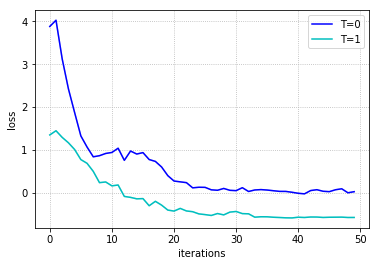

In [25]:
plt.style.use('seaborn-pastel')
plt.plot(np.asarray(ms).mean(axis=0), color='c')
plt.plot(np.asarray(ms_orig).mean(axis=0), color='b')

for m in ms:
    plt.plot(m, color='c', alpha=0.2)
    
for m in ms_orig:
    plt.plot(m, color='b', alpha=0.2)
    

plt.grid(True, ls=':')

plt.xlabel('iterations')
plt.ylabel('loss')

from matplotlib.lines import Line2D
cmap = plt.cm.coolwarm
custom_lines = [Line2D([0], [0], color='b'),
                Line2D([0], [0], color='c')]

plt.legend(custom_lines,['T=0', 'T=1']);
